<a href="https://colab.research.google.com/github/SahilMalla2001/21Days_21AI_Projects/blob/main/4_AI_in_Healthcare__Building_a_Life_Saving_Heart_Disease_Predictor_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
)

# Set plot style
sns.set_style("whitegrid")

In [ ]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Initial inspection
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2

In [ ]:
# Check for missing values
print("Missing Values:", df.isna().sum().sum())

Missing Values: 1759


In [ ]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


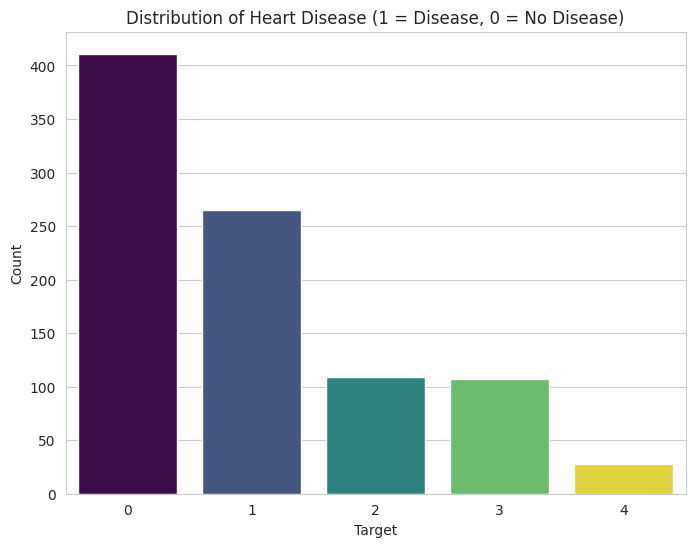

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="num", data=df, palette="viridis", hue="num", legend=False)
plt.title("Distribution of Heart Disease (1 = Disease, 0 = No Disease)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

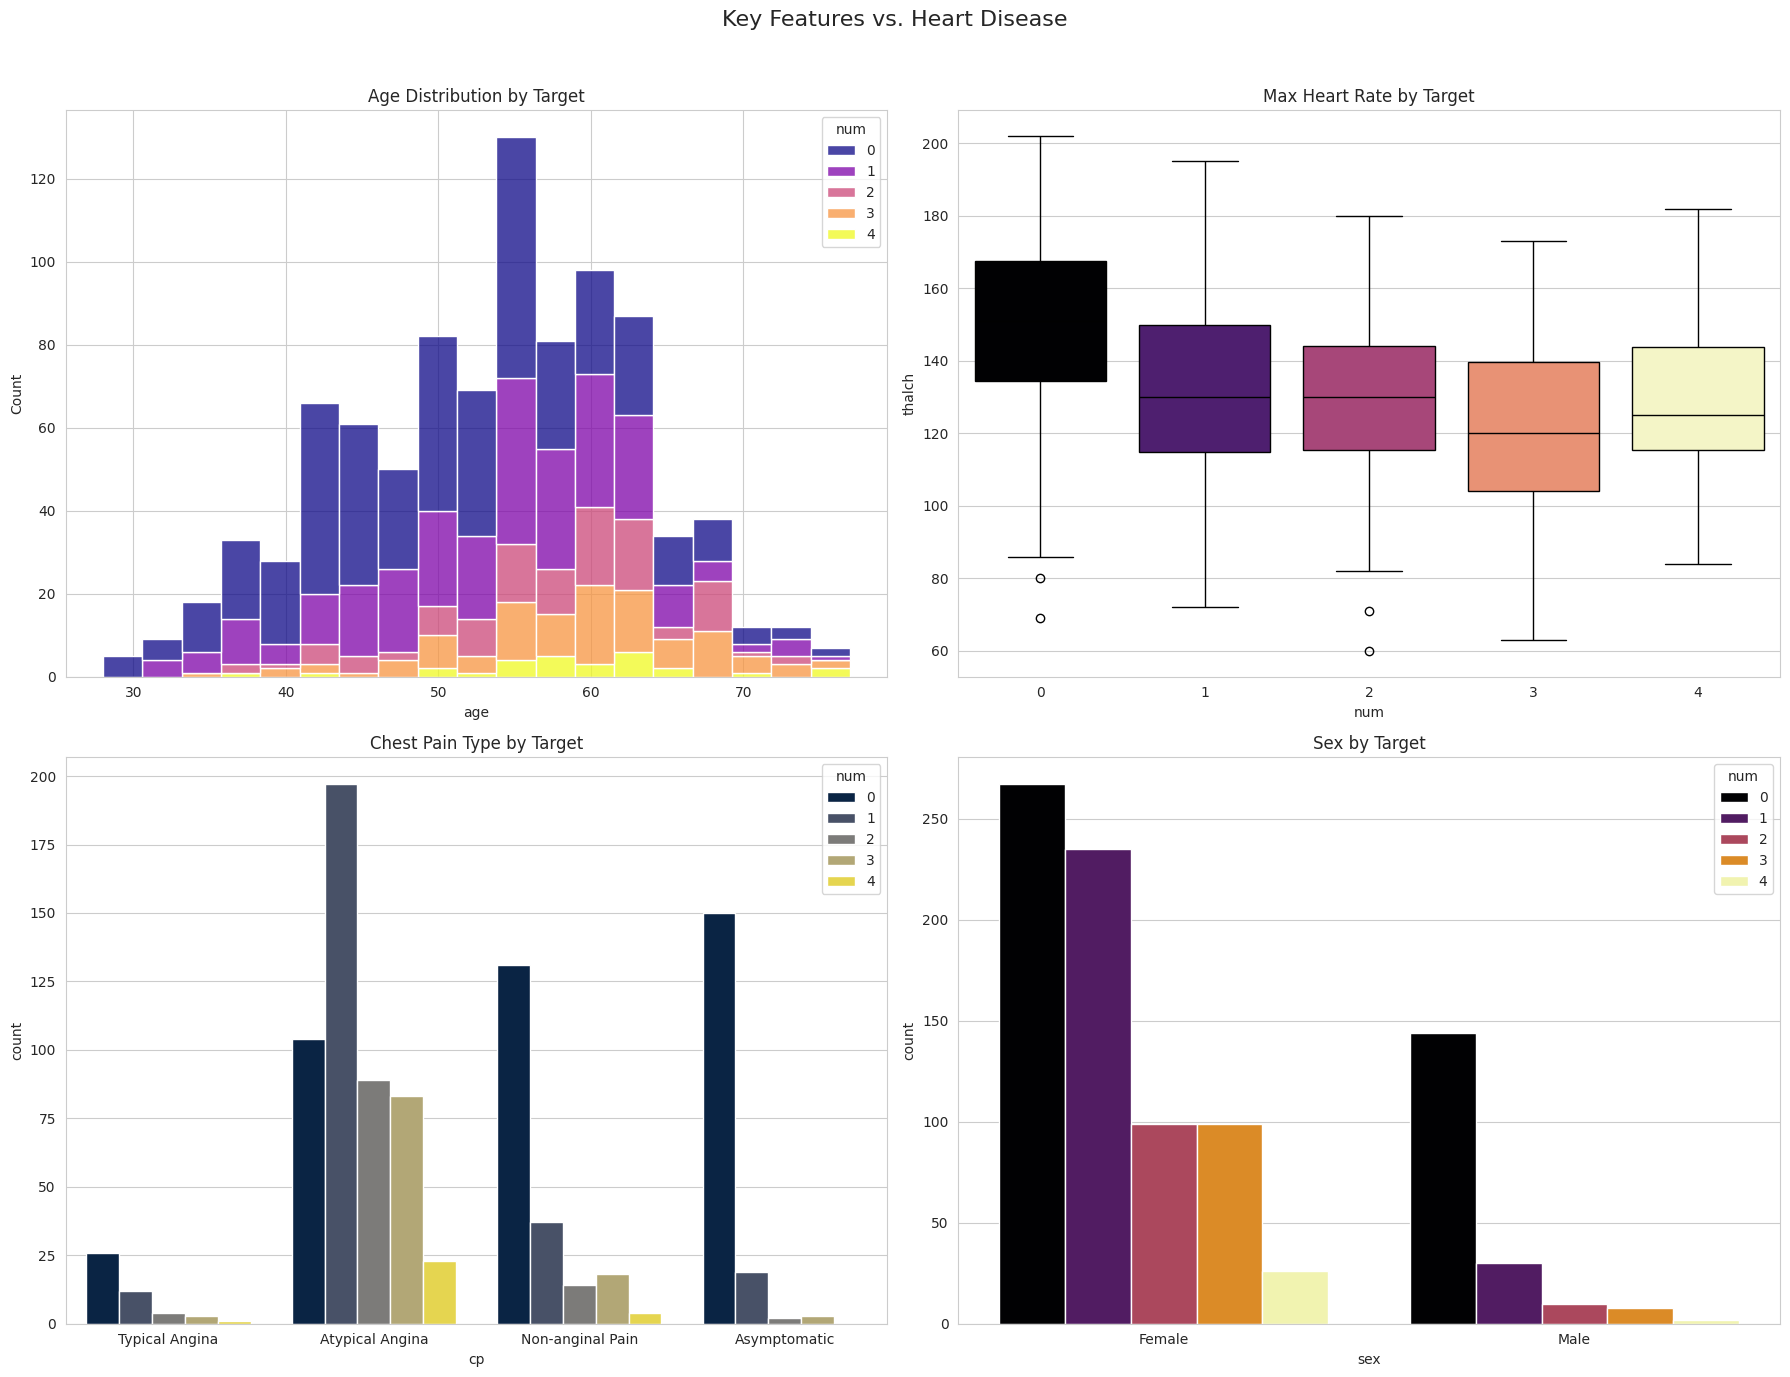

In [ ]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("Key Features vs. Heart Disease", fontsize=16)

# Age vs. Target
sns.histplot(
    ax=axes[0, 0], data=df, x="age", hue="num", multiple="stack", palette="plasma"
).set_title("Age Distribution by Target")

# Max Heart Rate vs. Target
sns.boxplot(
    ax=axes[0, 1],
    data=df,
    x="num",
    y="thalch",
    palette="magma",
    hue="num",
    legend=False,
).set_title("Max Heart Rate by Target")

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x="cp", hue="num", palette="cividis")
cp_plot.set_title("Chest Pain Type by Target")
cp_plot.set_xticks(range(len(df["cp"].unique())))
cp_plot.set_xticklabels(
    ["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"]
)

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x="sex", hue="num", palette="inferno")
sex_plot.set_title("Sex by Target")
sex_plot.set_xticks(range(len(df["sex"].unique())))
sex_plot.set_xticklabels(["Female", "Male"])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

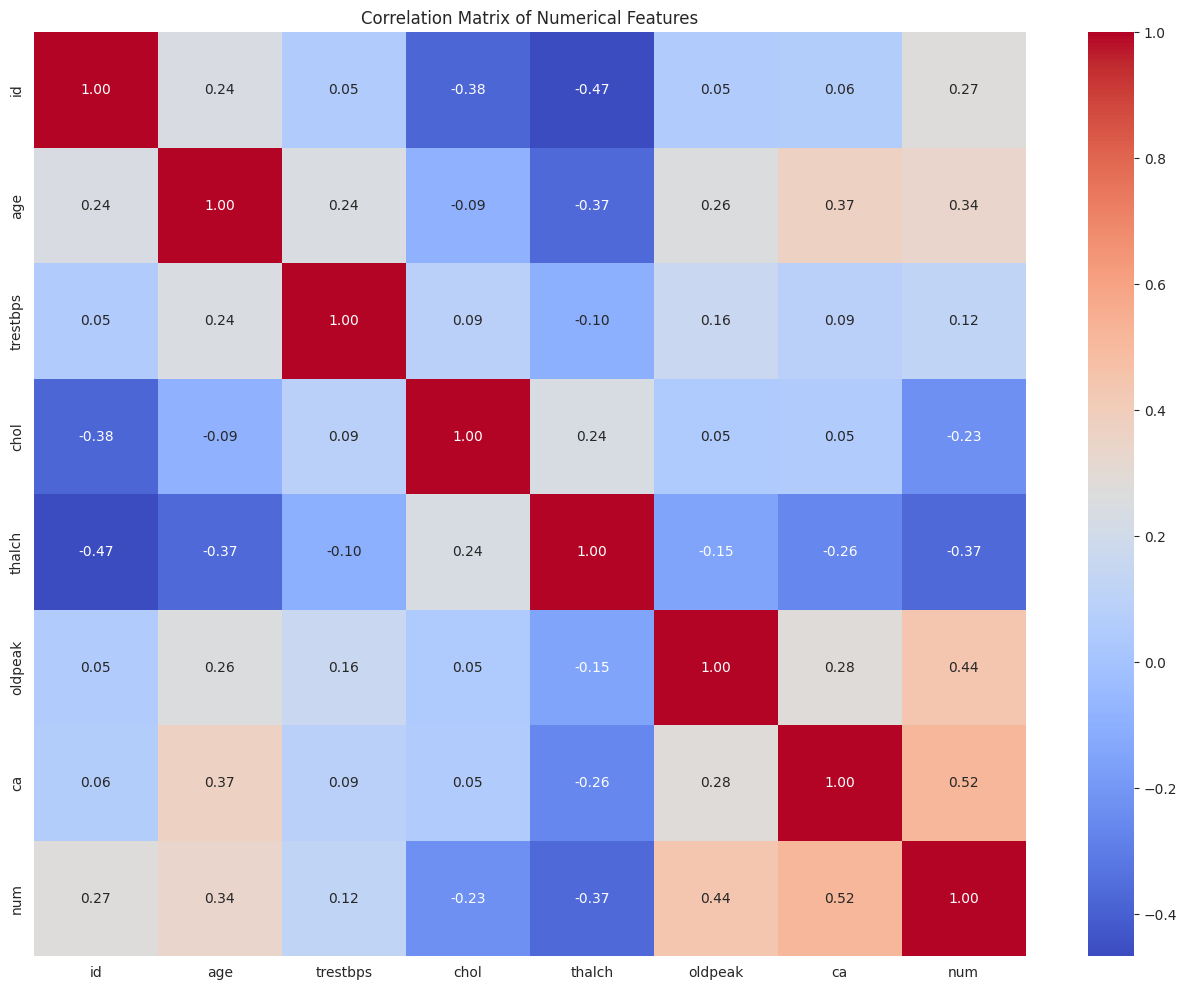

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
# 0 (no heart disease). If the value is any other (indicating heart disease), it is converted to 1.
df["num"] = df["num"].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# Define features (X) and target (y)
X = df.drop("num", axis=1)
y = df["num"]

# Drop the 'id' and 'dataset' columns as they are not features
X = X.drop(["id", "dataset"], axis=1)

# Identify categorical and numerical features
categorical_features = [col for col in X.columns if X[col].dtype == "object"]
numerical_features = [col for col in X.columns if X[col].dtype != "object"]

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)

for col in numerical_features:
    mean_value = X[col].mean()
    X[col].fillna(mean_value, inplace=True)

for col in categorical_features:
    mode_value = X[col].mode()[0]
    X[col].fillna(mode_value, inplace=True)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


/tmp/ipython-input-1025176243.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-1025176243.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
# Convert object columns to category type for one-hot encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standard scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

In [ ]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Decission Tree Performance ---")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

print("\n--- Gradient Boosting Performance ---")
print(classification_report(y_test, y_pred_gb, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        82
           1       0.82      0.87      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184


--- Decission Tree Performance ---
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        82
           1       0.78      0.85      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        82
           1       0.84      0.90      0.87       102

    accuracy                           0.85       184
   macro avg     

Evaluation Insight: Gradient Boosting outperforms all models with an accuracy of 0.86, excelling in both precision and recall, especially for class 1 (Heart Disease). Random Forest follows closely with 0.85 accuracy, showing strong performance across both classes. SVM achieves the highest recall (0.92) for class 1 but sacrifices precision (0.82). KNN performs similarly to SVM but lags slightly in precision. Logistic Regression underperforms with the lowest accuracy (0.82). Decision Tree has the weakest performance at 0.79 accuracy.

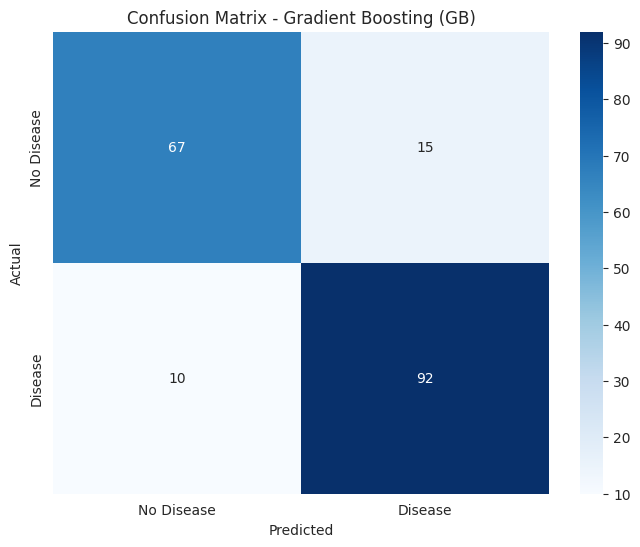

In [ ]:
# Visualize the confusion matrix for the best model (gb)
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting (GB)")
plt.show()

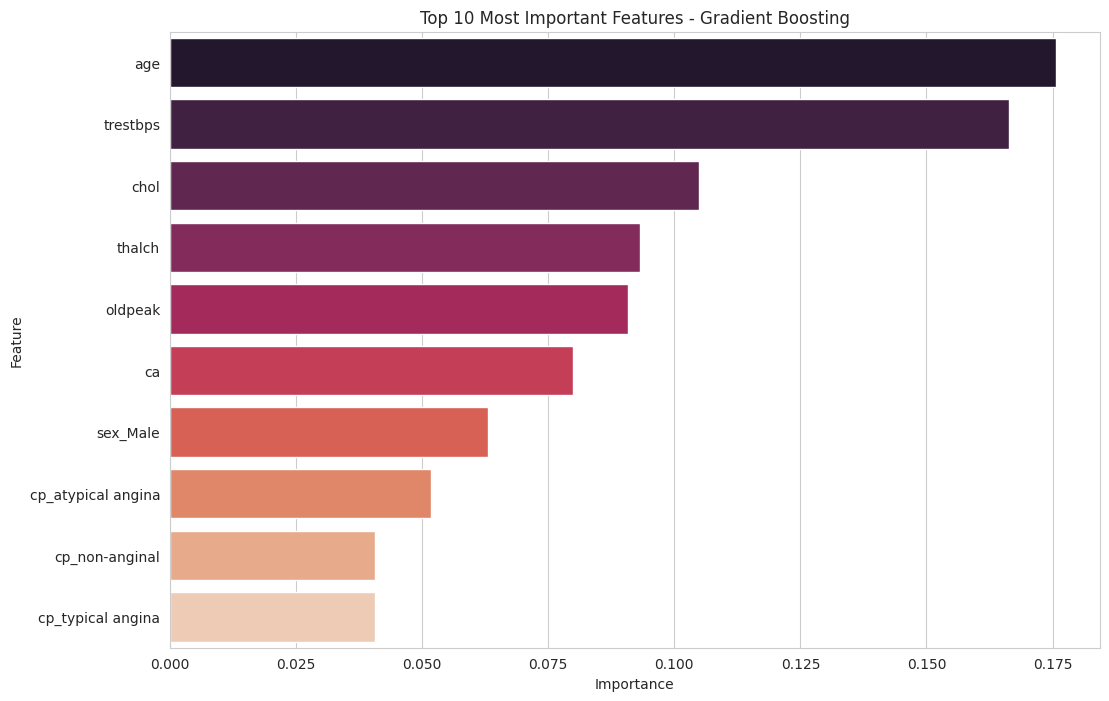

In [ ]:
# Get feature importances from the trained model
importances = pd.Series(gb.feature_importances_, index=X.columns).sort_values(
    ascending=False
)

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame(
    {"Feature": X_train.columns, "Importance": importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="rocket",
    hue="Feature",
    legend=False,
)
plt.title("Top 10 Most Important Features - Gradient Boosting")
plt.show()

Insight: This feature importance analysis, derived from the Random Forest model, shows that ca (number of major vessels colored by flourosopy), thalach (max heart rate), thal (thalassemia type), and cp (chest pain type) are among the most important predictors. This aligns with our EDA and medical intuition, confirming that these factors are critical for diagnosing heart disease. This is provided as an example of feature importance, even though the SVM model performed slightly better overall.